# Single Station Stacking

This notebook assumes that you have gone through the database creation and
can start using the traces at you disposal.

## Load a station into an RFStream

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='Conversion Time [s]', ylabel='A    '>

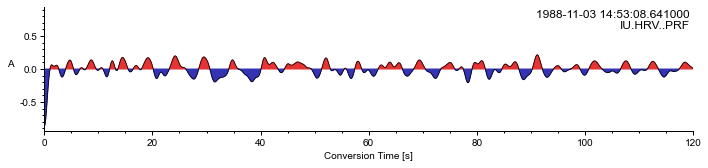

In [1]:
%load_ext autoreload
%autoreload 2

from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

# Check traces
rfst[0].plot()

# Backazimuthal and rayparameter distribution

To get a good overview of the stations data, 
it's often beneficial to see where your data 
is coming from. 
A quicklook of over the spatial distribution 
is provided but the function `RFStream.plot_rb_dist()`,
which plots the distributiton of backazimuths and 
rayparameters in the stream. 

---
***Note*** the keyword for the phase that must be parsed. 
An `RFStream` can contain different phases.
The rayparameters for, e.g., S receiver functions are slightly different, 
but so are the surface S velocities. Hence, we have to adjust 
the surface velocity for the incident wave to approximate the incidence angle.

---

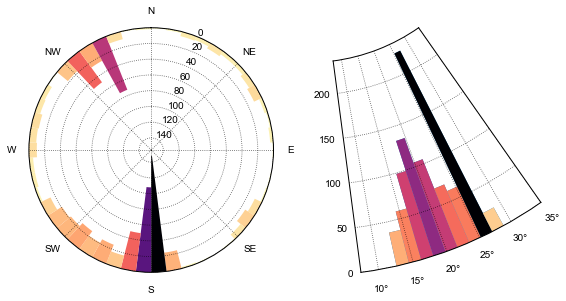

In [12]:
# Check distribtution
rfst.plot_distribution(phase="P")

## Moveout Correction

To stack the receiver functions, we need to perform moveout correction. To do this we use a
built-in velocity model. Here, `iasp91.dat`.

---
***Note:***
It is currently loaded from within the repo, therefore we change the path and back before doing anything.

---

In [13]:
import os
from pyglimer import RFStream 
from utils.helper import chdir

rfst.moveout("iasp91.dat", multiple=False)

/Users/lucassawade/OneDrive/Python/PyGLImER/src/pyglimer/rf/moveout.py:521: RuntimeWarning: invalid value encountered in sqrt
  q_a = np.sqrt(vp**-2 - p**2)


(array([ -1.00000000e+01,  -9.90000000e+00,  -9.80000000e+00,
         -9.70000000e+00,  -9.60000000e+00,  -9.50000000e+00,
         -9.40000000e+00,  -9.30000000e+00,  -9.20000000e+00,
         -9.10000000e+00,  -9.00000000e+00,  -8.90000000e+00,
         -8.80000000e+00,  -8.70000000e+00,  -8.60000000e+00,
         -8.50000000e+00,  -8.40000000e+00,  -8.30000000e+00,
         -8.20000000e+00,  -8.10000000e+00,  -8.00000000e+00,
         -7.90000000e+00,  -7.80000000e+00,  -7.70000000e+00,
         -7.60000000e+00,  -7.50000000e+00,  -7.40000000e+00,
         -7.30000000e+00,  -7.20000000e+00,  -7.10000000e+00,
         -7.00000000e+00,  -6.90000000e+00,  -6.80000000e+00,
         -6.70000000e+00,  -6.60000000e+00,  -6.50000000e+00,
         -6.40000000e+00,  -6.30000000e+00,  -6.20000000e+00,
         -6.10000000e+00,  -6.00000000e+00,  -5.90000000e+00,
         -5.80000000e+00,  -5.70000000e+00,  -5.60000000e+00,
         -5.50000000e+00,  -5.40000000e+00,  -5.30000000e+00,
        

## Creating a single station stack

In [14]:
# from utils.helper import chdir

# rfst.station_stack = chdir(rfst.station_stack)
# stack = rfst.station_stack(rfst)
stack = rfst.station_stack()

In [15]:
print(stack[1].stats.type)
print(len(stack[1].data))

stastack
851


<AxesSubplot:xlabel='Conversion Depth [km]', ylabel='A    '>

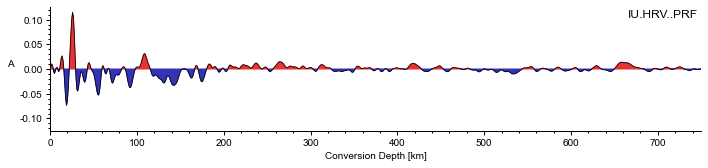

In [16]:
stack[1].plot()

# print()
# plt.plot(stack[0],stack[1].data)